# Interpolation - McClarren, Chapter 10

The goal: take a set of data points and fit a polynomial function to them.  This means that our function will go through the points, and we can then also evaluate the function between the points.  There are lots of good reasons for doing this, including integration, differentiation and getting values between the known data.  

Polynomials are useful for interpolation because they are easy to evaluate and can be readily generated. As we will see, high-degree polynomials are not always the best choice, but a set of low-degree polynomials can be quite useful when we have many data points.

## Polynomials 

We denote a polynomial that is of degree $n$ as $P_n (x)$. A polynomial of degree $n$ has $n + 1$
coefficients and is written as:

$$ P_n (x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n = \sum\limits_{i=0}^n a_i x^i $$

Recursion is our friend in the evaluation of polynomials:

In [1]:
def polynomial(a,x):
    """Evaluate a general 1-D polynomial at point
    Args:
        a: array of the n+1 coefficients of a polynomial
        x: the point to evaluate the polynomial at
    Returns:
        Pn(x)
    """
    num_coefficients = a.size
    answer = a[0]
    xpower = 1
    for i in range(1,num_coefficients):
        #the next power of x is x*previous power
        xpower *= x
        answer += a[i]*xpower
    return answer

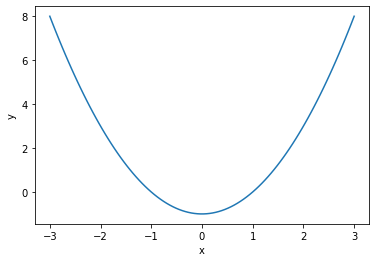

In [2]:
import numpy as np
import matplotlib.pyplot as plt
a = np.array([-1,0,1])
X_points = np.linspace(-3,3,100)
y = polynomial(a,X_points)
plt.plot(X_points,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

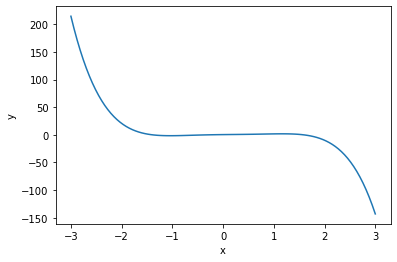

In [3]:
poly_degree = 5
a = np.random.uniform(-2,2,poly_degree + 1)#+1 because of 0
y = polynomial(a,X_points)
plt.plot(X_points,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Any function can be approximated by a polynomial to any desired degree of accuracy: Weierstrass approximation theorem -

For any function $f (x)$ defined on the interval $a \le x \le b$, there exists a degree $n$ polynomial with $n$ finite where

$$ \left| P_n(x) - f(x) \right| < \varepsilon $$

for all $x \in [a, b]$ and any $\varepsilon >0$.

In addition to the approximation properties of polynomials, these functions are also unique.  For a given set of $n + 1$ pairs of points $[x_i,f(x_i)]$, there is only one polynomial of degree $n$ that passes through all those points. This makes sense because a polynomial of degree $n$ has $n+1$ coefficients. Therefore, the $n+1$ data points define a unique polynomial. We will now discuss a method to compute the coefficients of polynomials given data.

## Lagrange Polynomials

Definitely the simplest way to interpolate a set of points.  Maybe not always the most efficient, but the savings realized by other approaches will most likely be in the noise...


The equations to construct a linear Lagrange polynomial are straightforward. Given points $a_0$ and $a_1$ and $f(a_0)$ and $f(a_1)$, the linear Lagrange polynomial formula is:

$$P_1(x) = \frac{x-a_1}{a_0-a_1} f(a_0) + \frac{x-a_0}{a_1-a_0} f(a_1) $$

In [4]:
def linear_interp(a,f,x):
    """Compute linear interpolant
    Args:
        a: array of the 2 points
        f: array of the value of f(a) at the 2 points
        Returns:
            The value of the linear interpolant at x
        """
    assert a.size == f.size
    answer = (x-a[1])/(a[0]-a[1])*f[0] + (x-a[0])/(a[1]-a[0])*f[1]
    return answer


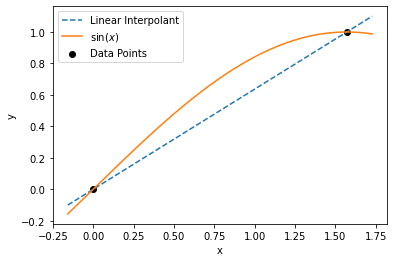

In [5]:
import numpy as np
import matplotlib.pyplot as plt
a = np.array([0,np.pi*0.5])
f = np.sin(a)
x = np.linspace(-0.05*np.pi,0.55*np.pi,200)
y = linear_interp(a,f,x)
plt.plot(x,y,linestyle="--",label="Linear Interpolant")
plt.plot(x,np.sin(x),label="$\sin(x)$")
plt.scatter(a,f,c="black",label="Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()

Here's the formula for the quadratic Lagrange polynomial:

$$P_2(x) = \frac{(x-a_1)(x-a_2)}{(a_0-a_1)(a_0-a_2)} f(a_0) + \frac{(x-a_0)(x-a_2)}{(a_1-a_0)(a_1-a_2)} f(a_1) + \frac{(x-a_0)(x-a_1)}{(a_2-a_0)(a_2-a_1)} f(a_2) $$

In [6]:
def quadratic_interp(a,f,x):
    """Compute the quadratic interpolant
    Args:
        a: array of the 3 points
        f: array of the value of f(a) at the 3 points
    Returns:
        The value of the quadratic interpolant at x
    """
    answer = (x-a[1])*(x-a[2])/(a[0]-a[1])/(a[0]-a[2])*f[0]
    answer += (x-a[0])*(x-a[2])/(a[1]-a[0])/(a[1]-a[2])*f[1]
    answer += (x-a[0])*(x-a[1])/(a[2]-a[0])/(a[2]-a[1])*f[2]
    return answer

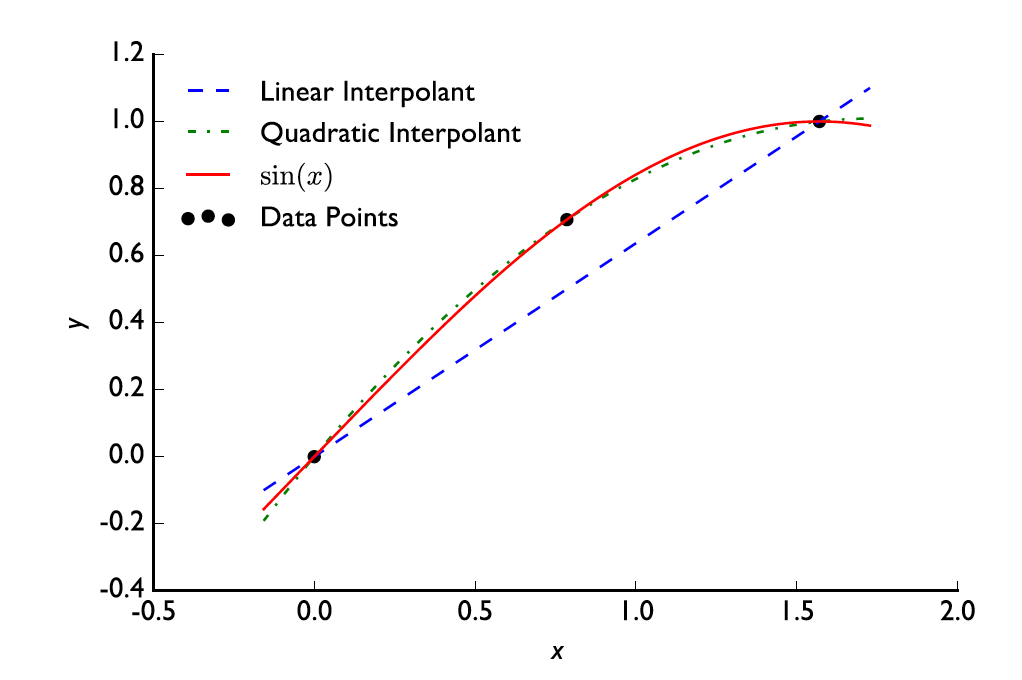

Comparing the linear and quadratic Lagrange interpolation formulas, we can begin to
see a pattern in the Lagrange interpolation formulas. Each term has in the numerator the
product of $(x − a_i)$ where the $a_i$’s are different than the point at which we evaluate $f(x)$. Also, the
denominator is the product of the $a$ point minus each other $a$ point.  The formula is:

$$P_n(x) = \sum\limits_{i=0}^n f(a_i) \left(\frac{\prod\limits_{j=0, j\ne i}^n (x-x_j)}{\prod\limits_{j=0, j\ne i}^n (x_i-x_j)}\right)$$

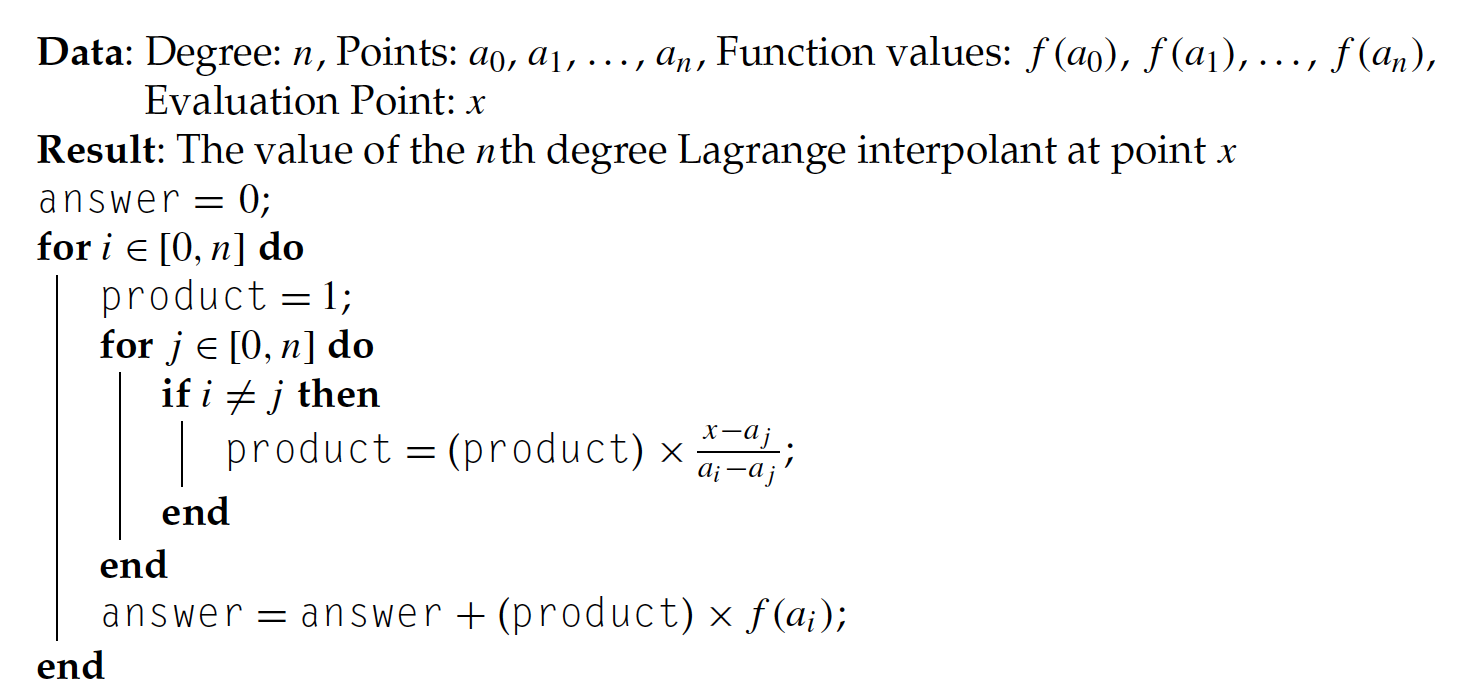

The general Lagrange polynomial interpolation algorithm then becomes...

In [8]:
def lagrange_interp(a,f,x):
    """Compute a lagrange interpolant
    Args:
        a: array of n points
        f: array of the value of f(a) at the n points
    Returns:
        The value of the Lagrange interpolant at x
    """
    answer = 0
    assert a.size == f.size
    n = a.size
    for i in range(n):
        product = 1
        for j in range(n):
            if (i != j):
                product *= (x-a[j])/(a[i]-a[j])
        answer += product*f[i]
    return answer

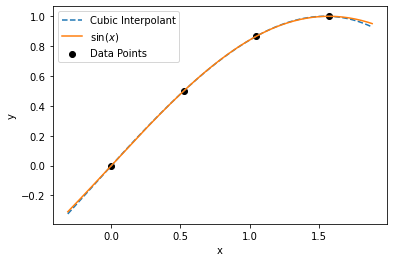

In [9]:
a = np.linspace(0,np.pi*0.5,4)
f = np.sin(a)
x = np.linspace(-0.1*np.pi,0.6*np.pi,200)
y = lagrange_interp(a,f,x)
plt.plot(x,y,linestyle="--",label="Cubic Interpolant")
plt.plot(x,np.sin(x),label="$\sin(x)$")
plt.scatter(a,f,c="black",label="Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()

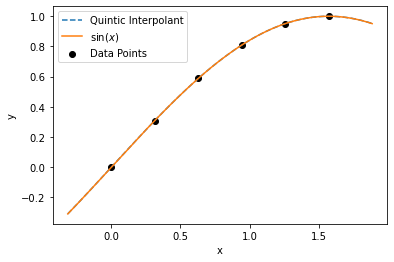

In [16]:
a = np.linspace(0,np.pi*0.5,6)
f = np.sin(a)
x = np.linspace(-0.1*np.pi,0.6*np.pi,200)
y = lagrange_interp(a,f,x)
plt.plot(x,y,linestyle="--",label="Quintic Interpolant")
plt.plot(x,np.sin(x),label="$\sin(x)$")
plt.scatter(a,f,c="black",label="Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()

## Efficiency of Lagrange Interpolation

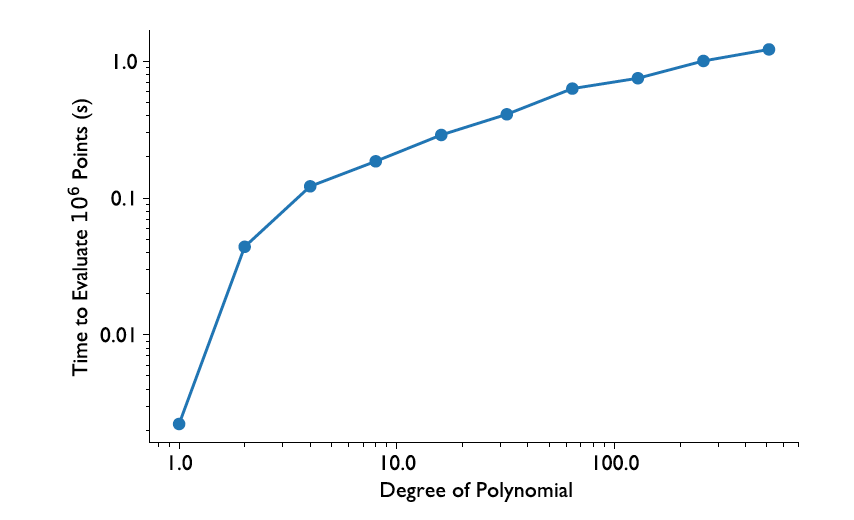

For almost any application the speed of modern computers means that our Lagrange polynomial is fast enough. This is especially true because using NumPy we can compute the value of the polynomial at many $x$ points at the same time for a given set of input data points. As shown in the figure below, it is possible to evaluate degree 512 polynomials at one million points in less than a second.

## The Runge Phenomenon

At degrees higher than 3, polynomial interpolation can be ill-behaved between the interpolation
data. Specifically, the interpolating polynomial can have large oscillations. We can
see this in a simple example with the function

$$ f(x) = \frac{1}{1+25 x^2}$$

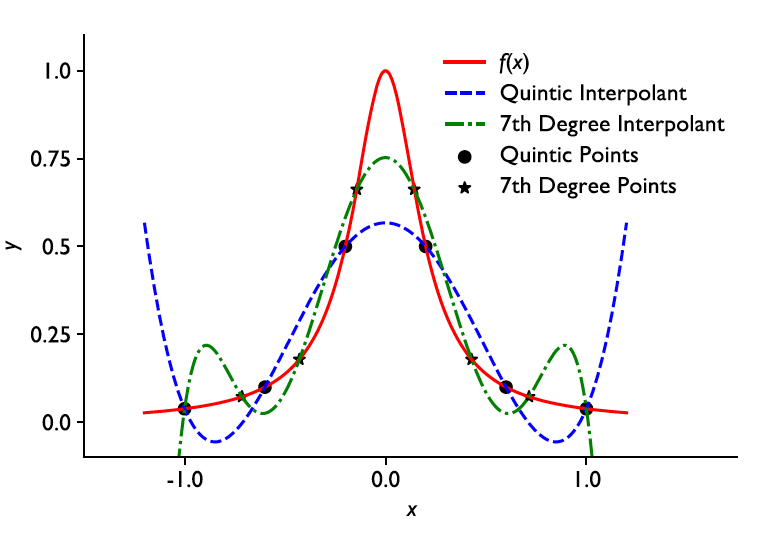

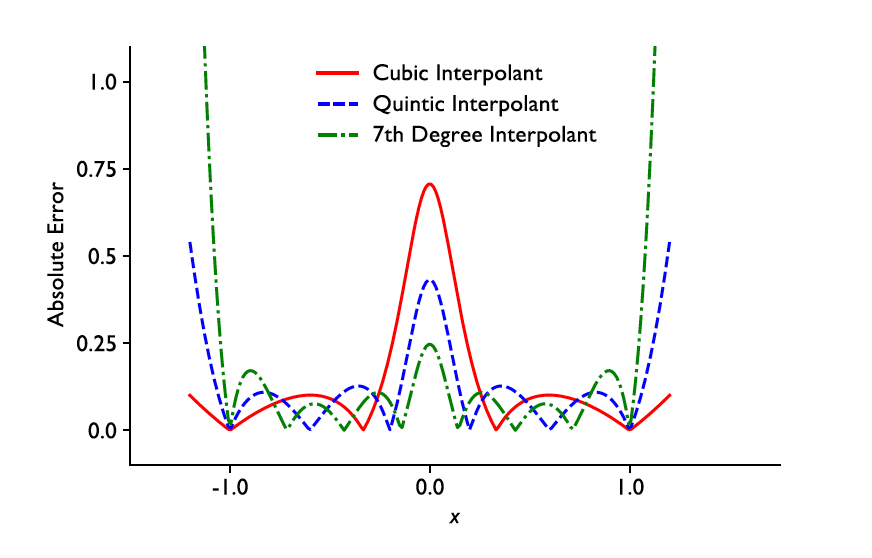



## Cubic Spline Interpolation

High order polynomial interpolation is problematic, but lower order polynomials defined over subsets of the data can work REALLY well.  A cubic spline is a piecewise cubic function that interpolates a set of data points and guarantees smoothness at the data points. 

Let's illustrate this concept with piecewise linear fits.

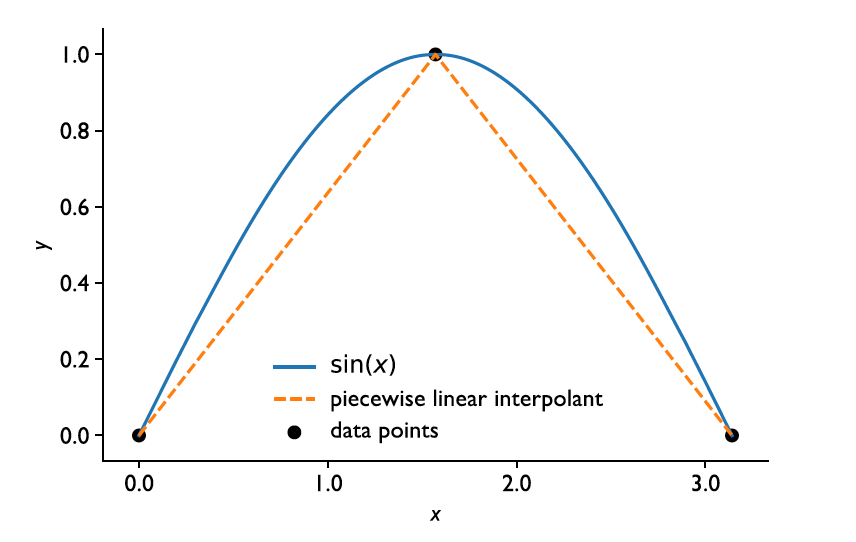

Not bad, but:

- the function is not smooth at the data points: it has a discontinuous derivative at some points.  
- we saw before that the quadratic was better...

Cubic splines are an improvement over piecewise linear interpolation.  They
are continuous in the zeroth through second derivatives and pass through all the data points.
The name *spline* comes from thin sticks, called splines, that were used in drafting in the
days before computers. One also could imagine that these flexible sticks were used to strike
colleagues in moments of merriment or anger. [Oh Dr. McClarren, you are SO FUNNY...]

Let's start with the $n+1$ data points $(x_i,y_i)$ or *knots*, which also implies that there are $n$ intervals and $n-1$ interior (not at the beginning or end) points.  Here is the function for the cubic on the interval from point $(i-1)$ to point $i$:

$$ f_i(x) = a_i + b_i x + c_i x^2 + d_i x^3.$$

The cubics need to match at the knot points so:

$$ f_1 (x_1) = y_1,$$

$$ f_i(x_{i+1}) = f_{i+1}(x_{i+1}) = y_{i+1}, $$

$$ f_n (x_{n+1}) = y_{n+1},$$

where are $2n$ total conditions, when the end points are included.  In terms of the polynomials, this looks like:

$$ a_1 + b_1 x_1 + c_1 x_1^2 + d_1 x_1^3 = y_1,$$

$$ a_{i+1} + b_{i+1} x_{i+1} + c_{i+1} x_{i+1}^2 + d_{i+1} x_{i+1}^3 = a_{i} + b_{i} x_{i+1} + c_{i} x_{i+1}^2 + d_{i} x_{i+1}^3,$$

$$ a_{n} + b_{n} x_{n+1} + c_{n} x_{n+1}^2 + d_{n} x_{n+1}^3 = y_{n+1}.$$

We also need to make the derivatives continuous at the interior knot points,

$$ f_i'(x_{i+1}) = f_{i+1}'(x_{i+1}), \qquad 1 \le i < n. $$

The $n-1$ equations for this are:

$$  b_{i+1} + 2 c_{i+1} x_{i+1} + 3 d_{i+1} x_{i+1}^2 = b_{i} + 2 c_{i} x_{i+1} + 3 d_{i} x_{i+1}^2, \qquad 1 \le i < n.$$

Finally, we need to make the second derivatives continous at the interior knot points:

$$f_i'' (x_{i+1}) = f_{i+1}'' (x_{i+1}), \qquad 1 \le i < n. $$

The $(n-1)$ equations for equality are:

$$ 2 c_{i+1} + 6 d_{i+1} x_{i+1} = 2 c_{i} + 6 d_{i} x_{i+1}, \qquad 1 \le i < n.$$

For the $n$ intervals there are $4n$ unknowns (4 coefficients for each cubic). We have $4n − 2$
equations at this point so we need two more equations. The natural choice is to set the second
derivative to be zero at the two endpoints:

$$f_i''(x_1) = 0, \qquad f_n''(x_{n+1}) = 0.$$

In [1]:
import numpy as np 
#knot points are sin(x) at 0, pi/2,pi
n = 2 #2 intervals
a = [0,np.pi/2.0,np.pi]
y_a = np.sin(a)
data = np.zeros((n+1,2))
data[:,0] = a
data[:,1] = y_a
coef_matrix = np.zeros((4*n,4*n))
coefs = np.zeros(4*n)
rhs = np.zeros(4*n)
#set up the 2n equations that match the data at the knot points
#first point
x = data[0,0]
coef_matrix[0,0:4] = [1,x,x**2,x**3]
rhs[0] = data[0,1]
#second point
x = data[1,0]
coef_matrix[1,0:4] = [1,x,x**2,x**3]
rhs[1] = data[1,1]
x = data[1,0]
coef_matrix[2,4:8] = [1,x,x**2,x**3]
rhs[2] = data[1,1]
#third point
x = data[2,0]
coef_matrix[3,4:8] = [1,x,x**2,x**3]
rhs[3] = data[2,1]
print(coef_matrix[0:4,:])

[[ 1.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 1.          1.57079633  2.4674011   3.87578459  0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          1.          1.57079633
   2.4674011   3.87578459]
 [ 0.          0.          0.          0.          1.          3.14159265
   9.8696044  31.00627668]]


In [2]:
#now the first derivative equations
#second point
x = data[1,0]
coef_matrix[4,0:4] = [0,1,2*x,3*x**2]
rhs[4] = 0
coef_matrix[4,4:8] = [0,-1,-2*x,-3*x**2]

In [6]:
#now the second derivative equations
#second point
x = data[1,0]
coef_matrix[5,0:4] = [0,0,2,6*x]
rhs[5] = 0
coef_matrix[5,4:8] = [0,0,-2,-6*x]
#set first point to 0
x = data[0,0]
coef_matrix[6,0:4] = [0,0,-2,6*x]
rhs[6] = 0
#set last point to 0
x = data[2,0]
coef_matrix[7,4:8] = [0,0,2,6*x]
rhs[7] = 0
print(coef_matrix)
print(rhs)
print(coef_matrix.shape)

[[ 1.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 1.          1.57079633  2.4674011   3.87578459  0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          1.          1.57079633
   2.4674011   3.87578459]
 [ 0.          0.          0.          0.          1.          3.14159265
   9.8696044  31.00627668]
 [ 0.          1.          3.14159265  7.4022033   0.         -1.
  -3.14159265 -7.4022033 ]
 [ 0.          0.          2.          9.42477796  0.          0.
  -2.         -9.42477796]
 [ 0.          0.         -2.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   2.         18.84955592]]
[0.0000000e+00 1.0000000e+00 1.0000000e+00 1.2246468e-16 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00]
(8, 8)


In [8]:
import numpy as np
def swap_rows(A, a, b):
    """Rows two rows in a matrix, switch row a with row b
    
    args:
        A: matrix to perform row swaps on
        a: row index of matrix
        b: row index of matrix
        
    returns: nothing
    
    side effects:
    changes A to rows a and b swapped
    """
    assert (a>=0) and (b>=0)
    N = A.shape[0] #number of rows
    assert (a<N) and (b<N) #less than because 0-based indexing
    temp = A[a,:].copy()
    A[a,:] = A[b,:].copy()
    A[b,:] = temp.copy()
def BackSub(aug_matrix,x):
    """back substitute a N by N system after Gaussian elimination
    
    Args:
        aug_matrix: augmented matrix with zeros below the diagonal
        x: length N vector to hold solution
    Returns:
        nothing
    Side Effect:
    x now contains solution
    """
    N = x.size
    for row in range(N-1,-1,-1):
        RHS = aug_matrix[row,N]
        for column in range(row+1,N):
            RHS -= x[column]*aug_matrix[row,column]
        x[row] = RHS/aug_matrix[row,row]
    return
def GaussElimPivotSolve(A,b,LOUD=0):
    """create a Gaussian elimination with pivoting matrix for a system
    
    Args:
        A: N by N array
        b: array of length N
    Returns:
        solution vector in the original order
    """
    [Nrow, Ncol] = A.shape
    assert Nrow == Ncol
    N = Nrow
    #create augmented matrix
    aug_matrix = np.zeros((N,N+1))
    aug_matrix[0:N,0:N] = A
    aug_matrix[:,N] = b
    #augmented matrix is created
    
    #create scale factors
    s = np.zeros(N)
    count = 0
    for row in aug_matrix[:,0:N]: #don't include b
        s[count] = np.max(np.fabs(row))
        count += 1
    if LOUD:
        print("s =",s)
    if LOUD:
        print("Original Augmented Matrix is\n",aug_matrix)
    #perform elimination
    for column in range(0,N):
        
        #swap rows if needed
        largest_pos = np.argmax(np.fabs(aug_matrix[column:N,column]/s[column])) + column
        if (largest_pos != column):
            if (LOUD):
                print("Swapping row",column,"with row",largest_pos)
                print("Pre swap\n",aug_matrix)
            swap_rows(aug_matrix,column,largest_pos)
            #re-order s
            tmp = s[column]
            s[column] = s[largest_pos]
            s[largest_pos] = tmp
            if (LOUD):
                print("A =\n",aug_matrix)
        #finish off the row
        for row in range(column+1,N):
            mod_row = aug_matrix[row,:]
            mod_row = mod_row - mod_row[column]/aug_matrix[column,column]*aug_matrix[column,:]
            aug_matrix[row] = mod_row
    #now back solve
    x = b.copy()
    if LOUD:
        print("Final aug_matrix is\n",aug_matrix)
    BackSub(aug_matrix,x)
    return x

In [9]:
#solve for the cubic coefficients
coefs = GaussElimPivotSolve(coef_matrix,rhs)
print(coefs)

[ 0.          0.95492966  0.         -0.12900614 -1.          2.86478898
 -1.2158542   0.12900614]


These coefficients imply that our spline solution has the form:

$$ f(x) =  
\begin{align*}
0.95492966 x −0.12900614 x^3 & \qquad x \le \frac{\pi}{2} \\
−1 + 2.86478898 x − 1.2158542 x^2 + 0.12900614 x^3 & \qquad x \ge \frac{\pi}{2}.
\end{align*}  $$

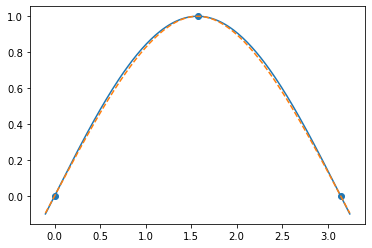

In [12]:
import matplotlib.pyplot as plt
#evaluate function
points = 200
X = np.linspace(-0.1,np.pi+0.1,points)
y_interp = np.zeros(points)
for i in range(points):
    if (X[i] < np.min(data[:,0])):
        spline = 0
    elif (X[i] > np.max(data[0:n,0])):
        spline = n-1
    else:
        #knot to the left is spline
        spline = np.argmax(X[i]-data[:,0])
    y_interp[i] = np.sum(coefs[4*spline:(4*spline+4)] *
                     [1,X[i],X[i]**2,X[i]**3])
plt.plot(X,np.sin(X), label="$\sin(x)$")
plt.plot(X,y_interp, linestyle="--", label="Cubic Spline")
plt.scatter(data[:,0],data[:,1],label="knot points")

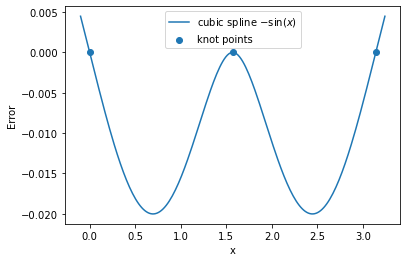

In [13]:
plt.plot(X,y_interp-np.sin(X), label="cubic spline $- \sin(x)$")
plt.scatter(data[:,0],0*data[:,1],label="knot points");
plt.xlabel("x")
plt.ylabel("Error")
plt.legend(loc="best")

Making the cubic spline was straightforward, but tedious. Additionally, evaluating the
splines involved determining which spline to use and then evaluating the function. Thankfully,
the package *SciPy*, a companion package for NumPy that implements many numerical
algorithms, has a cubic spline function that we can use.

There are several options for the conditions at the beginning and end points.
We have already discussed the natural spline conditions where the second derivative of the
splines at the first and last knot point are set to zero, i.e.,

$$ f_1'' (x_1) = f_n'' (x_{n+1}) = 0,$$

Another type of spline is the *clamped* spline where the first-derivative is set to zero at the
end points:

$$f_1'(x_1) = f_n'(x_{n+1}) = 0, $$

The default condition used by CubicSpline is the *not-a-knot* condition where the third
derivative of the first and last splines is fixed so that it matches the third derivative at the
nearest interior point:

$$f_1''' (x_2) = f_2''' (x_2), \qquad f_{n−1}'''(x_n) = f_n''' (x_n).$$

Plugging in the cubics to this equation we get the conditions

$$ a_1 = a_2, \qquad a_{n−1} = a_n.$$

This implies that the spline in the first and $n$th interval are the same as the splines in the
second and $(n−1)$ intervals, respectively. In this sense, the endpoints are not treated as knots,
just a point that the interior spline must pass through.

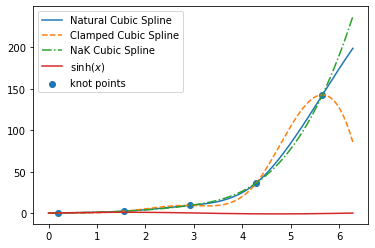

In [17]:
from scipy.interpolate import CubicSpline
#define data
a = np.linspace(0.2,np.pi*1.8,5)
data = np.zeros((5,2))
data[:,0] = a
data[:,1] = np.sinh(a)
#define splines
splineFunction = CubicSpline(data[:,0],data[:,1],bc_type='natural')
splineFuncClamp = CubicSpline(data[:,0],data[:,1],bc_type='clamped')
splineFuncNot = CubicSpline(data[:,0],data[:,1],bc_type='not-a-knot')
#make plot
points = 200
X = np.linspace(0,np.pi*2,points)
plt.plot(X,splineFunction(X),
         label="Natural Cubic Spline")
plt.plot(X,splineFuncClamp(X),linestyle="--",
         label="Clamped Cubic Spline")
plt.plot(X,splineFuncNot(X),linestyle="-.",
         label="NaK Cubic Spline")
plt.plot(X,np.sin(X), label="$\sinh(x)$")
plt.scatter(data[:,0],data[:,1],label="knot points")
plt.legend();

Clamped splines force a local extreme point to be created at the endpoints because the derivative
goes to zero. Similarly, the natural splines create an inflection point (i.e., the second derivative
is zero at the endpoints). For this particular problem the *not-a-knot* splines work
best near the large values of x.

On the Runge phenomenon example from before, cubic spline interpolants perform better
than high-degree polynomials as shown in this next figure.

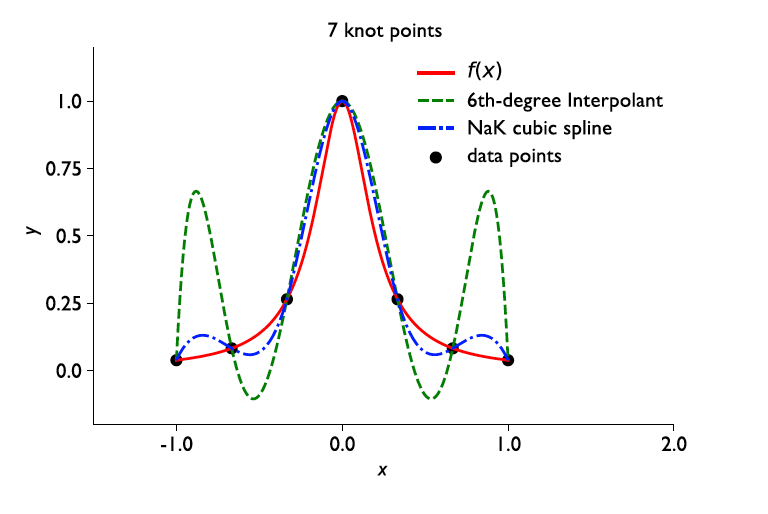

If we add two more points, notice how the splines get better, but the full polynomial gets worse.

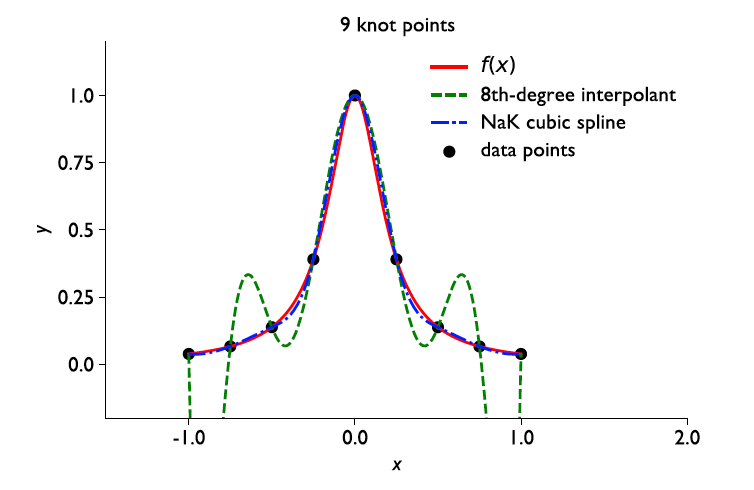

Sometimes it is not desirable to have the function touch every point. These problems are curve-fitting problems and sometimes called *regression*. In these problems (see below), we do not want the function to interpolate the data but to find some trend in the data. In the following figure a line that has had random noise
added to it is shown, along with the original function, a cubic spline interpolant, and a line fitted by linear regression.

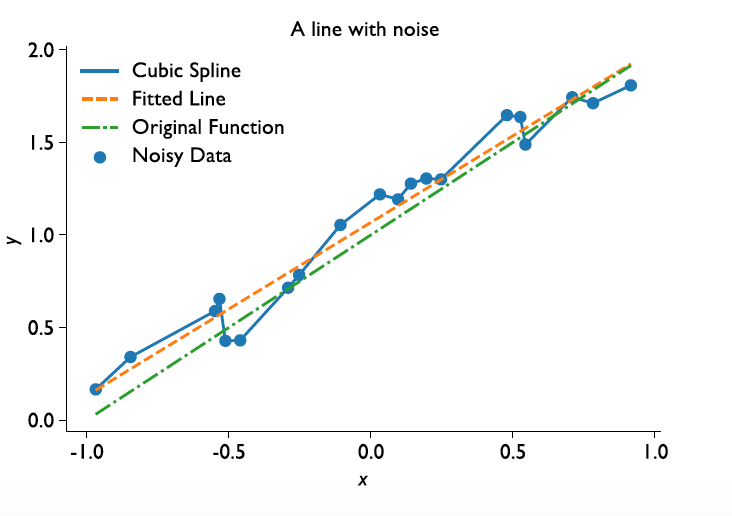